#### 0. Import packages

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import seaborn as sns

#### 1. Data import from excel

In [36]:
df = pd.read_excel('commodity_data_overview.xlsx', sheet_name="data", skiprows=[0])

In [37]:
df = df.set_index('Date')

In [41]:
df.head()

,Instrument_1,Instrument_2,Instrument_3,Instrument_4,Instrument_5,Instrument_6,Instrument_7,Instrument_8,Instrument_9,Instrument_10,Instrument_11,Instrument_12
Date,,,,,,,,,,,,
2023-10-25,3515.34,3928.82,12724.29,3303.06,29017.79,39939.27,3136.11,36.26,1430.00,142.78,135.27,126.61
2023-10-24,3470.98,3869.41,12755.19,3341.87,28949.67,39749.16,3121.05,36.33,1400.83,139.52,132.66,127.65
2023-10-23,3447.22,3833.76,12629.24,3330.78,28796.00,39430.74,3124.98,36.40,1420.24,142.31,135.43,127.53
2023-10-20,3455.93,3862.28,12592.01,3326.03,29447.11,39581.24,3138.37,36.99,1417.46,146.00,140.60,128.97
2023-10-19,3461.48,3825.05,12662.51,3322.86,29339.38,39929.76,3126.74,36.50,1411.01,146.35,141.58,129.52


In [42]:
df.tail()

,Instrument_1,Instrument_2,Instrument_3,Instrument_4,Instrument_5,Instrument_6,Instrument_7,Instrument_8,Instrument_9,Instrument_10,Instrument_11,Instrument_12
Date,,,,,,,,,,,,
2003-01-08,NaN,NaN,NaN,NaN,NaN,NaN,559.62,7.67,971.11,45.61,48.41,NaN
2003-01-07,NaN,NaN,NaN,NaN,NaN,NaN,549.72,7.59,960.18,46.46,49.24,NaN
2003-01-06,NaN,NaN,NaN,NaN,NaN,NaN,556.21,7.75,966.05,47.84,50.85,NaN
2003-01-03,NaN,NaN,NaN,NaN,NaN,NaN,555.90,7.70,954.48,48.75,52.41,NaN
2003-01-02,NaN,NaN,NaN,NaN,NaN,NaN,546.95,7.60,960.03,46.62,50.46,NaN


In [43]:
df.shape

(5424, 12)

In [44]:
df.dtypes

Instrument_1     float64
Instrument_2     float64
Instrument_3     float64
Instrument_4     float64
Instrument_5     float64
Instrument_6     float64
Instrument_7     float64
Instrument_8     float64
Instrument_9     float64
Instrument_10    float64
Instrument_11    float64
Instrument_12    float64
dtype: object

#### 2. Analyse missing values

In [45]:
# Number and proportion of missing values per column
{col: [df[col].isnull().sum(), f'{np.round(np.mean(df[col].isnull()*100), 1)}%'
      ] for col in df.columns if df[col].isnull().any()}

{'Instrument_1': [751, '13.8%'],
 'Instrument_2': [766, '14.1%'],
 'Instrument_3': [751, '13.8%'],
 'Instrument_4': [751, '13.8%'],
 'Instrument_5': [757, '14.0%'],
 'Instrument_6': [751, '13.8%'],
 'Instrument_7': [5, '0.1%'],
 'Instrument_8': [4, '0.1%'],
 'Instrument_9': [5, '0.1%'],
 'Instrument_10': [65, '1.2%'],
 'Instrument_11': [185, '3.4%'],
 'Instrument_12': [664, '12.2%']}

##### 2.1. Proportion of missing values for each instrument on montly basis

In [46]:
def dist_na_bymonth(df):
    """
    Calculates the distribution of missing values in a DataFrame by month.

    Parameters:
    df (pandas.DataFrame): The input DataFrame containing data.

    Returns:
    pandas.DataFrame: A DataFrame that represents the distribution of missing values by month.
    The index contains monthly timestamps, and the values represent the proportion of missing values
    (NaN) over the total count of values for each month, rounded to two decimal places.
    """
    df_na_month = df.isna().groupby(pd.Grouper(freq='M'))
    df_na_month = df_na_month.apply(lambda x: x.sum() / x.count()).round(decimals=2) # x.sum() - count NA per month; x.count() - number of business days per month
    return df_na_month

In [47]:
df_dist_na = dist_na_bymonth(df=df)

In [48]:
df_dist_na.head()

,Instrument_1,Instrument_2,Instrument_3,Instrument_4,Instrument_5,Instrument_6,Instrument_7,Instrument_8,Instrument_9,Instrument_10,Instrument_11,Instrument_12
Date,,,,,,,,,,,,
2003-01-31,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.00,0.05,1.0
2003-02-28,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.00,0.05,1.0
2003-03-31,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.00,0.00,1.0
2003-04-30,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.09,0.05,1.0
2003-05-31,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.09,0.05,1.0


In [49]:
df_dist_na.tail()

,Instrument_1,Instrument_2,Instrument_3,Instrument_4,Instrument_5,Instrument_6,Instrument_7,Instrument_8,Instrument_9,Instrument_10,Instrument_11,Instrument_12
Date,,,,,,,,,,,,
2023-06-30,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.05,0.0
2023-07-31,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.05,0.0
2023-08-31,0.04,0.04,0.04,0.04,0.04,0.04,0.0,0.0,0.0,0.0,0.00,0.0
2023-09-30,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.05,0.0
2023-10-31,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.0


In [50]:
df_dist_na.shape

(250, 12)

In [51]:
def subsplots_dist_na_month(df, plot_int=3):
    """
    Generates subplots representing the distribution of missing values in the input DataFrame by month over time.

    Parameters:
    df (pandas.DataFrame): The input DataFrame containing data.
    plot_int (int, optional): Number of subplot intervals to divide the data by year for visualization.
        Default is 3.

    This function first calculates the distribution of missing values by month using the 'dist_na_bymonth' function.
    It then divides the years covered in the data into 'plot_int' intervals to create subplots. Each subplot displays
    a heatmap showing the proportion of missing values in each month for the specified time intervals.

    Returns:
    None

    The function generates subplots in a single figure using seaborn's heatmap, where each subplot represents a
    time period defined by the 'plot_int'. The heatmaps depict the proportion of missing values in each month
    across the specified time intervals. The color range from green to red indicates the proportion of missing
    values from 0 to 1. The title of each subplot specifies the time horizon covered by the displayed data.
    """
    df_dist_na = dist_na_bymonth(df=df)

    years_unique = df_dist_na.index.year.unique().sort_values(ascending=True)  # Unique years
    years_split = np.array_split(years_unique, plot_int)  # Split years into plot_int periods

    fig = plt.figure(figsize=(35, 15))
    for count, split in enumerate(years_split, start=1):
        min_year, max_year = split.min(), split.max()

        df_dist_na_subset = df_dist_na[df_dist_na.index.year.isin(split)]
        df_dist_na_subset.index = df_dist_na_subset.index.strftime('%Y-%m')

        plt.subplot(plot_int, 1, count)
        sns.heatmap(df_dist_na_subset.transpose(), cmap='RdYlGn_r', vmin=0, vmax=1, linewidths=0.2).set(
            title=f'Proportion of missing values in each month. Time horizon from year {min_year} to {max_year}'
        )

    plt.tight_layout()
    plt.show()

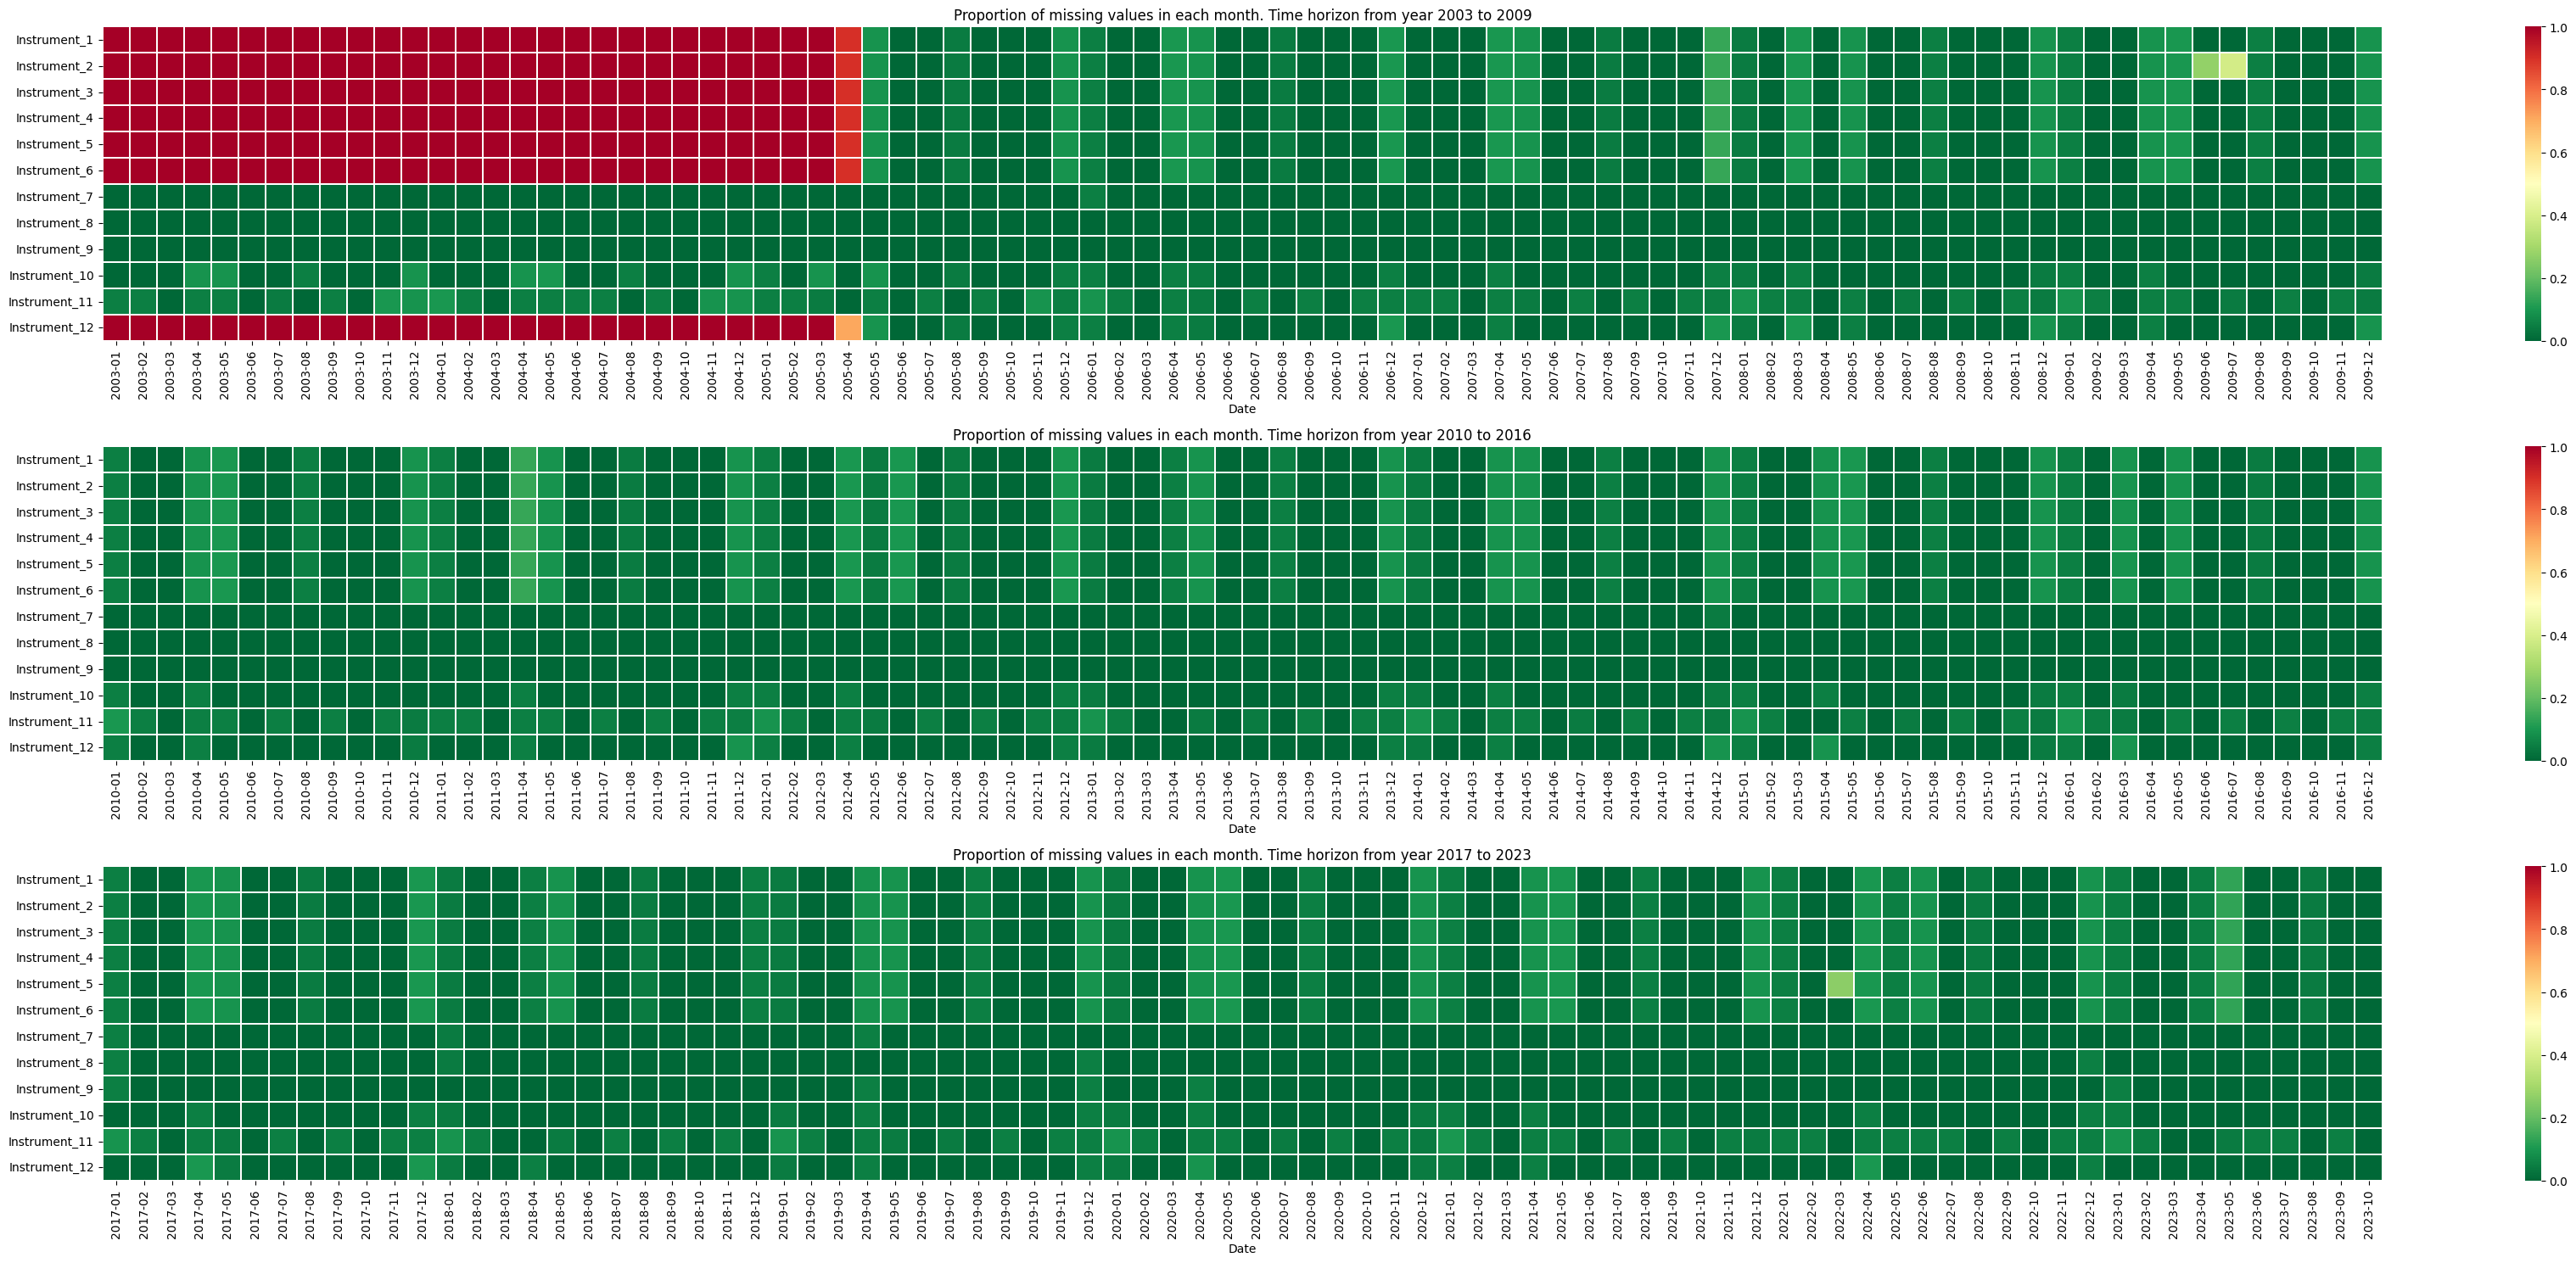

In [52]:
subsplots_dist_na_month(df=df, plot_int=3)

##### 2.2. After which month there is the highest decline of missing values in the dataset ?

In [53]:
def diff_na_per_month(df):
    """
    Calculates the difference in the total count of missing values between consecutive months in the input DataFrame.

    Parameters:
    df (pandas.DataFrame): The input DataFrame containing data.

    Returns:
    pandas.Series: A Series representing the difference in the total count of missing values between consecutive months.
    The function groups the DataFrame by month, counts the missing values for each month, then calculates the
    difference in the total count of missing values between consecutive months using the 'diff' function.
    The resulting Series shows the changes in the cumulative count of missing values from one month to the next.
    """
    df_count_na = df.isna().groupby(pd.Grouper(freq='M')).sum()
    diff_na_month = df_count_na.sum(axis=1).diff(-1)
    return diff_na_month

In [54]:
diff_na_month = diff_na_per_month(df=df)
date_highest_change = diff_na_month.idxmax() # get index with highest series value
print('The highest reduction of missing values is after', date_highest_change.strftime('%d.%m.%Y'))

The highest reduction of missing values is after 30.04.2005


In [55]:
# Leave data points after this period
df = df.loc[:date_highest_change]

In [56]:
df.shape

(4818, 12)

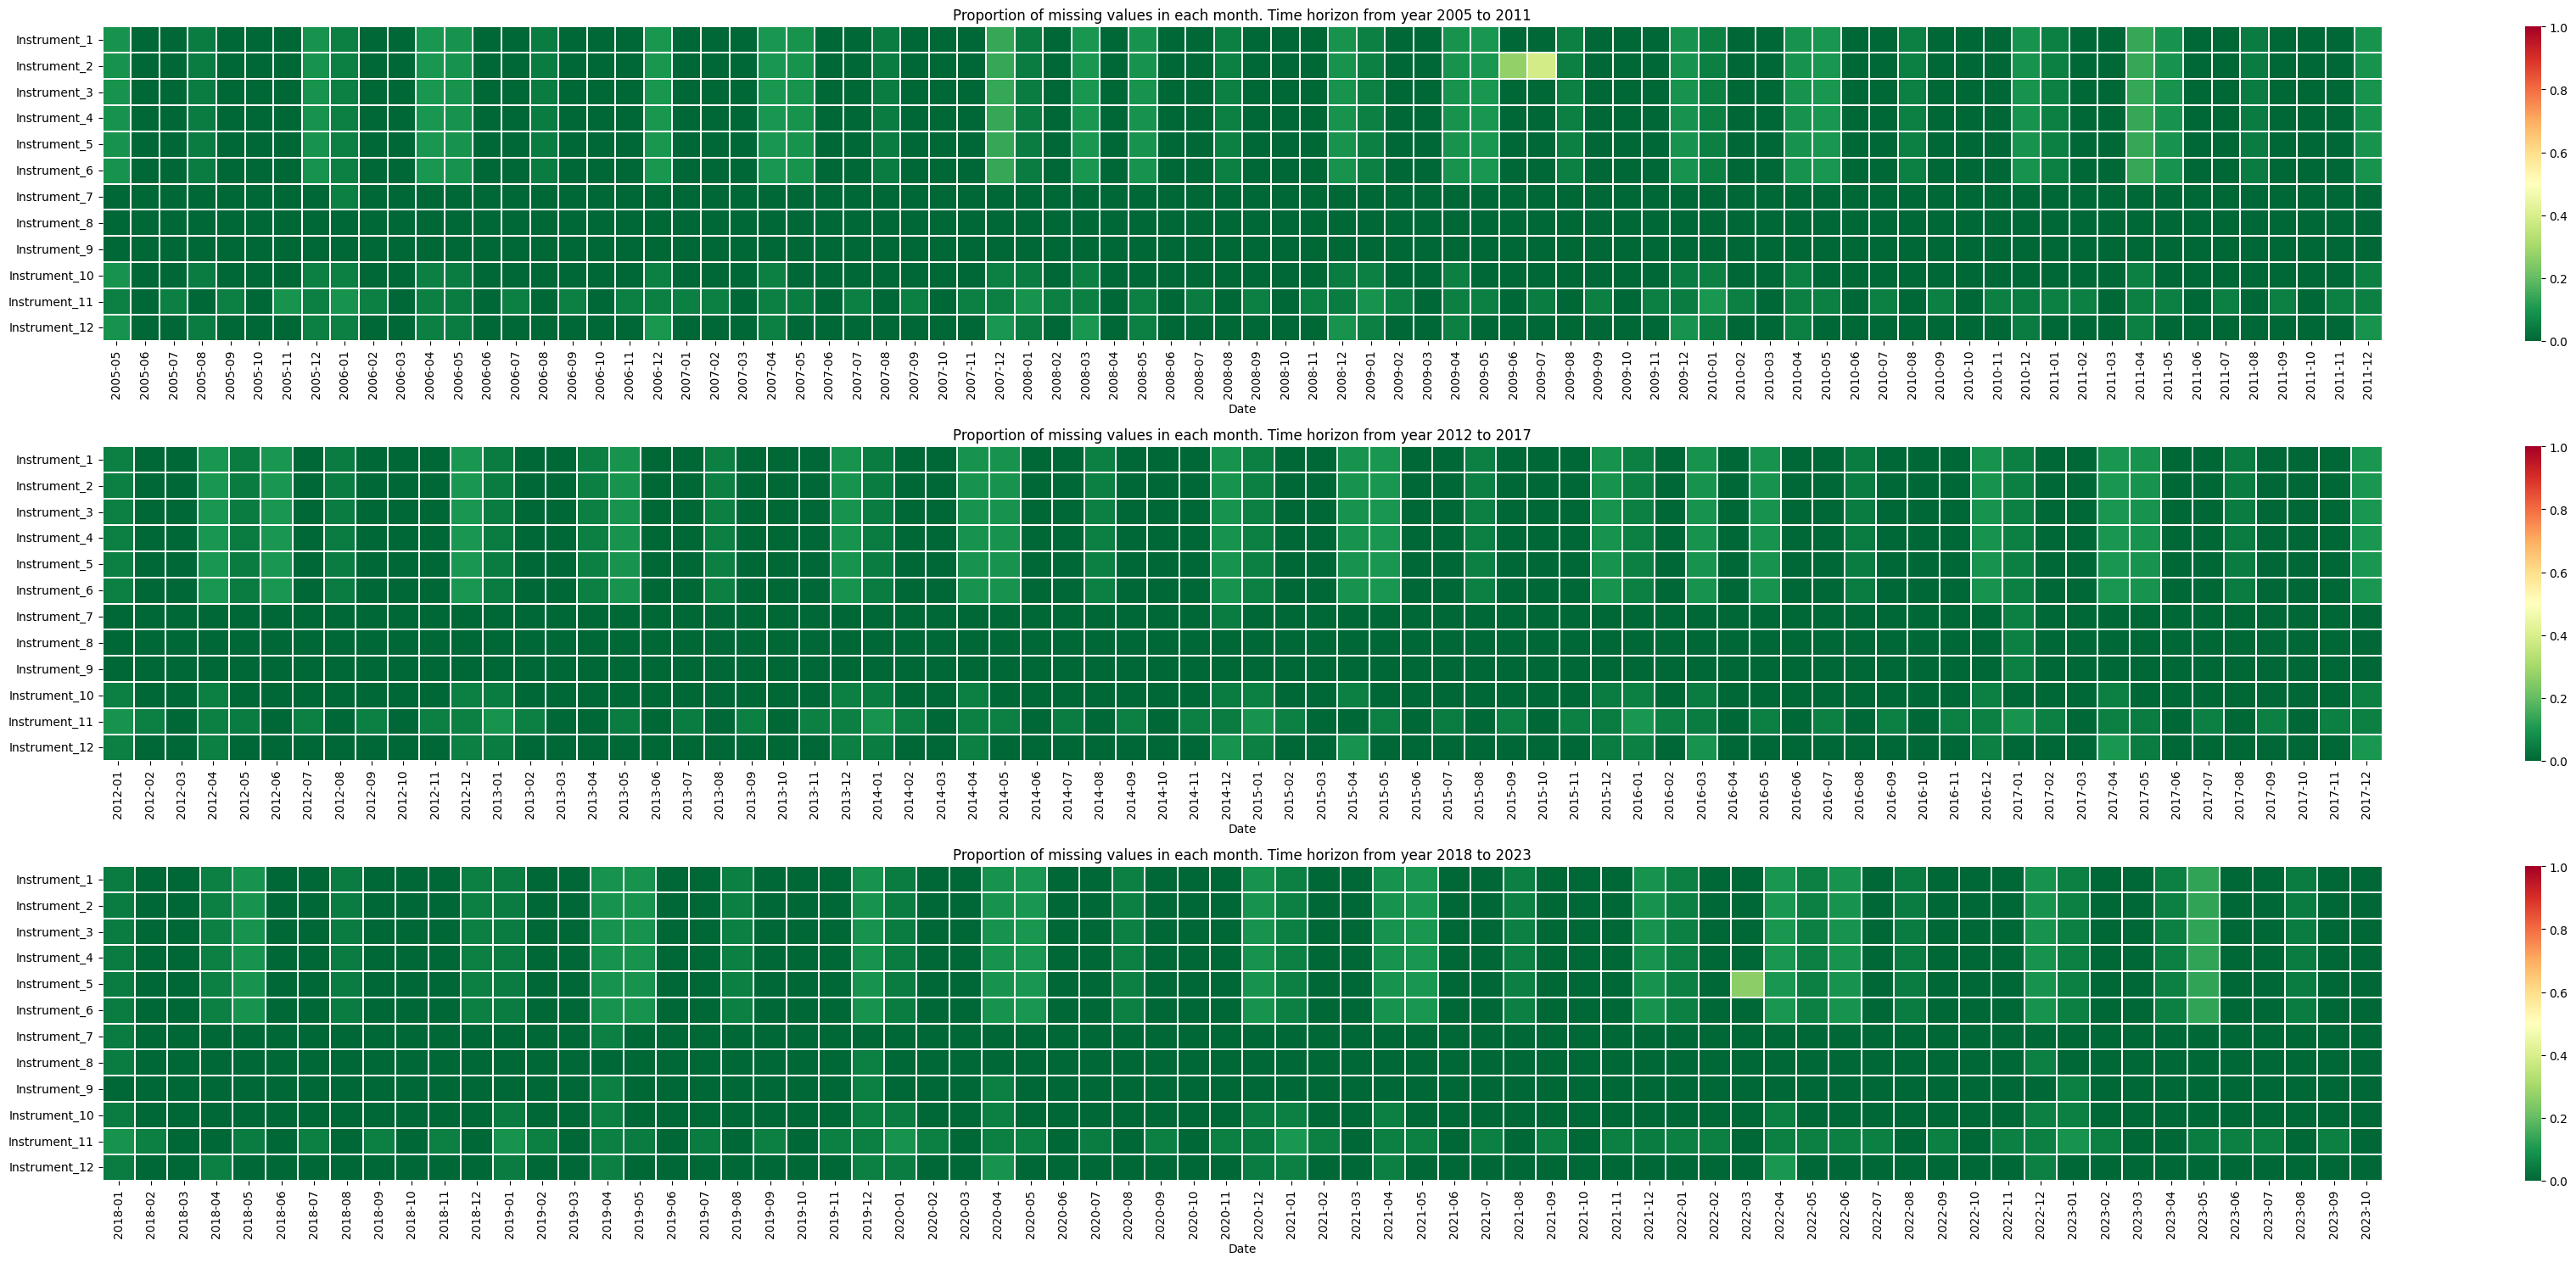

In [57]:
subsplots_dist_na_month(df=df, plot_int=3)

##### 2.3. Analyse months where the proportion of missing value is relatively high

In [58]:
def na_month_over_threshold(df, threshold=0.2):
    """
    Identifies the months where the proportion of missing values exceeds the specified threshold.

    Parameters:
    df (pandas.DataFrame): The input DataFrame containing data.
    threshold (float, optional): The threshold above which a month is considered to have a high proportion
        of missing values. Default is 0.2 (20%).

    Returns:
    pandas.DatetimeIndex: A DatetimeIndex containing the months where the proportion of missing values
    exceeds the defined threshold.

    This function first calculates the distribution of missing values by month using the 'dist_na_bymonth' function.
    It then identifies the months where the maximum proportion of missing values is above the specified threshold.
    The resulting DatetimeIndex contains the timestamps of the months where the proportion of missing values is higher
    than the provided threshold.
    """
    df_dist_na = dist_na_bymonth(df=df)
    na_above_threshold = df_dist_na.index[df_dist_na.max(axis=1) > threshold]
    return na_above_threshold

In [59]:
period_na_threshold = na_month_over_threshold(df=df, threshold=0.2)
print('For months', ', '.join(period_na_threshold.strftime('%Y-%m')), 'at least one instrument contains specified proportion of missing values')

For months 2009-06, 2009-07, 2022-03 at least one instrument contains specified proportion of missing values


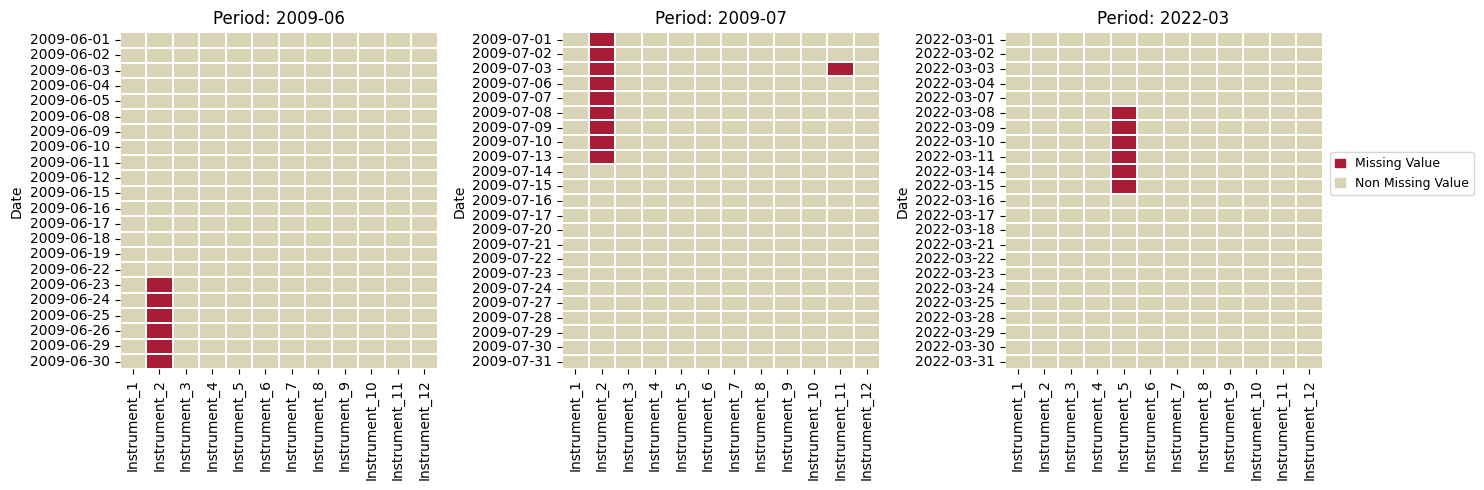

In [60]:
fig = plt.figure(figsize=(15,5))
cmap = ["#DAD4B6", "#A91D36"]

for count, period in enumerate(period_na_threshold, start=1):
    # Data subsetting
    df_subset = df.loc[(df.index.year == period.year) & (df.index.month == period.month)]
    df_subset = df_subset.sort_index()
    df_subset.index = df_subset.index.strftime('%Y-%m-%d')

    # Plot settings
    subplot_title = period.strftime('%Y-%m')
    plt.subplot(1, len(period_na_threshold), count)
    sns.heatmap(df_subset.isna(), cmap=cmap, linewidth=0.2, cbar=False).set(title=f'Period: {subplot_title}')
    legend_handles = [Patch(color=cmap[True], label='Missing Value'), Patch(color=cmap[False], label='Non Missing Value')]
    
plt.legend(handles=legend_handles, ncol=1, bbox_to_anchor=[1.25, 0.5], loc='lower center', fontsize=9, handlelength=0.8)  
plt.tight_layout()
plt.show()  

In [61]:
print('The second instrument contains missing value for two weeks. As this occured 14 years ago, we fill it with previous available value. Similarly for fifth instrument. Though it is in 2022, there are only 6 working days missing')

The second instrument contains missing value for two weeks. As this occured 14 years ago, we fill it with previous available value. Similarly for fifth instrument. Though it is in 2022, there are only 6 working days missing


In [62]:
df = df.ffill().bfill()

##### 2.4. Final check of missing values

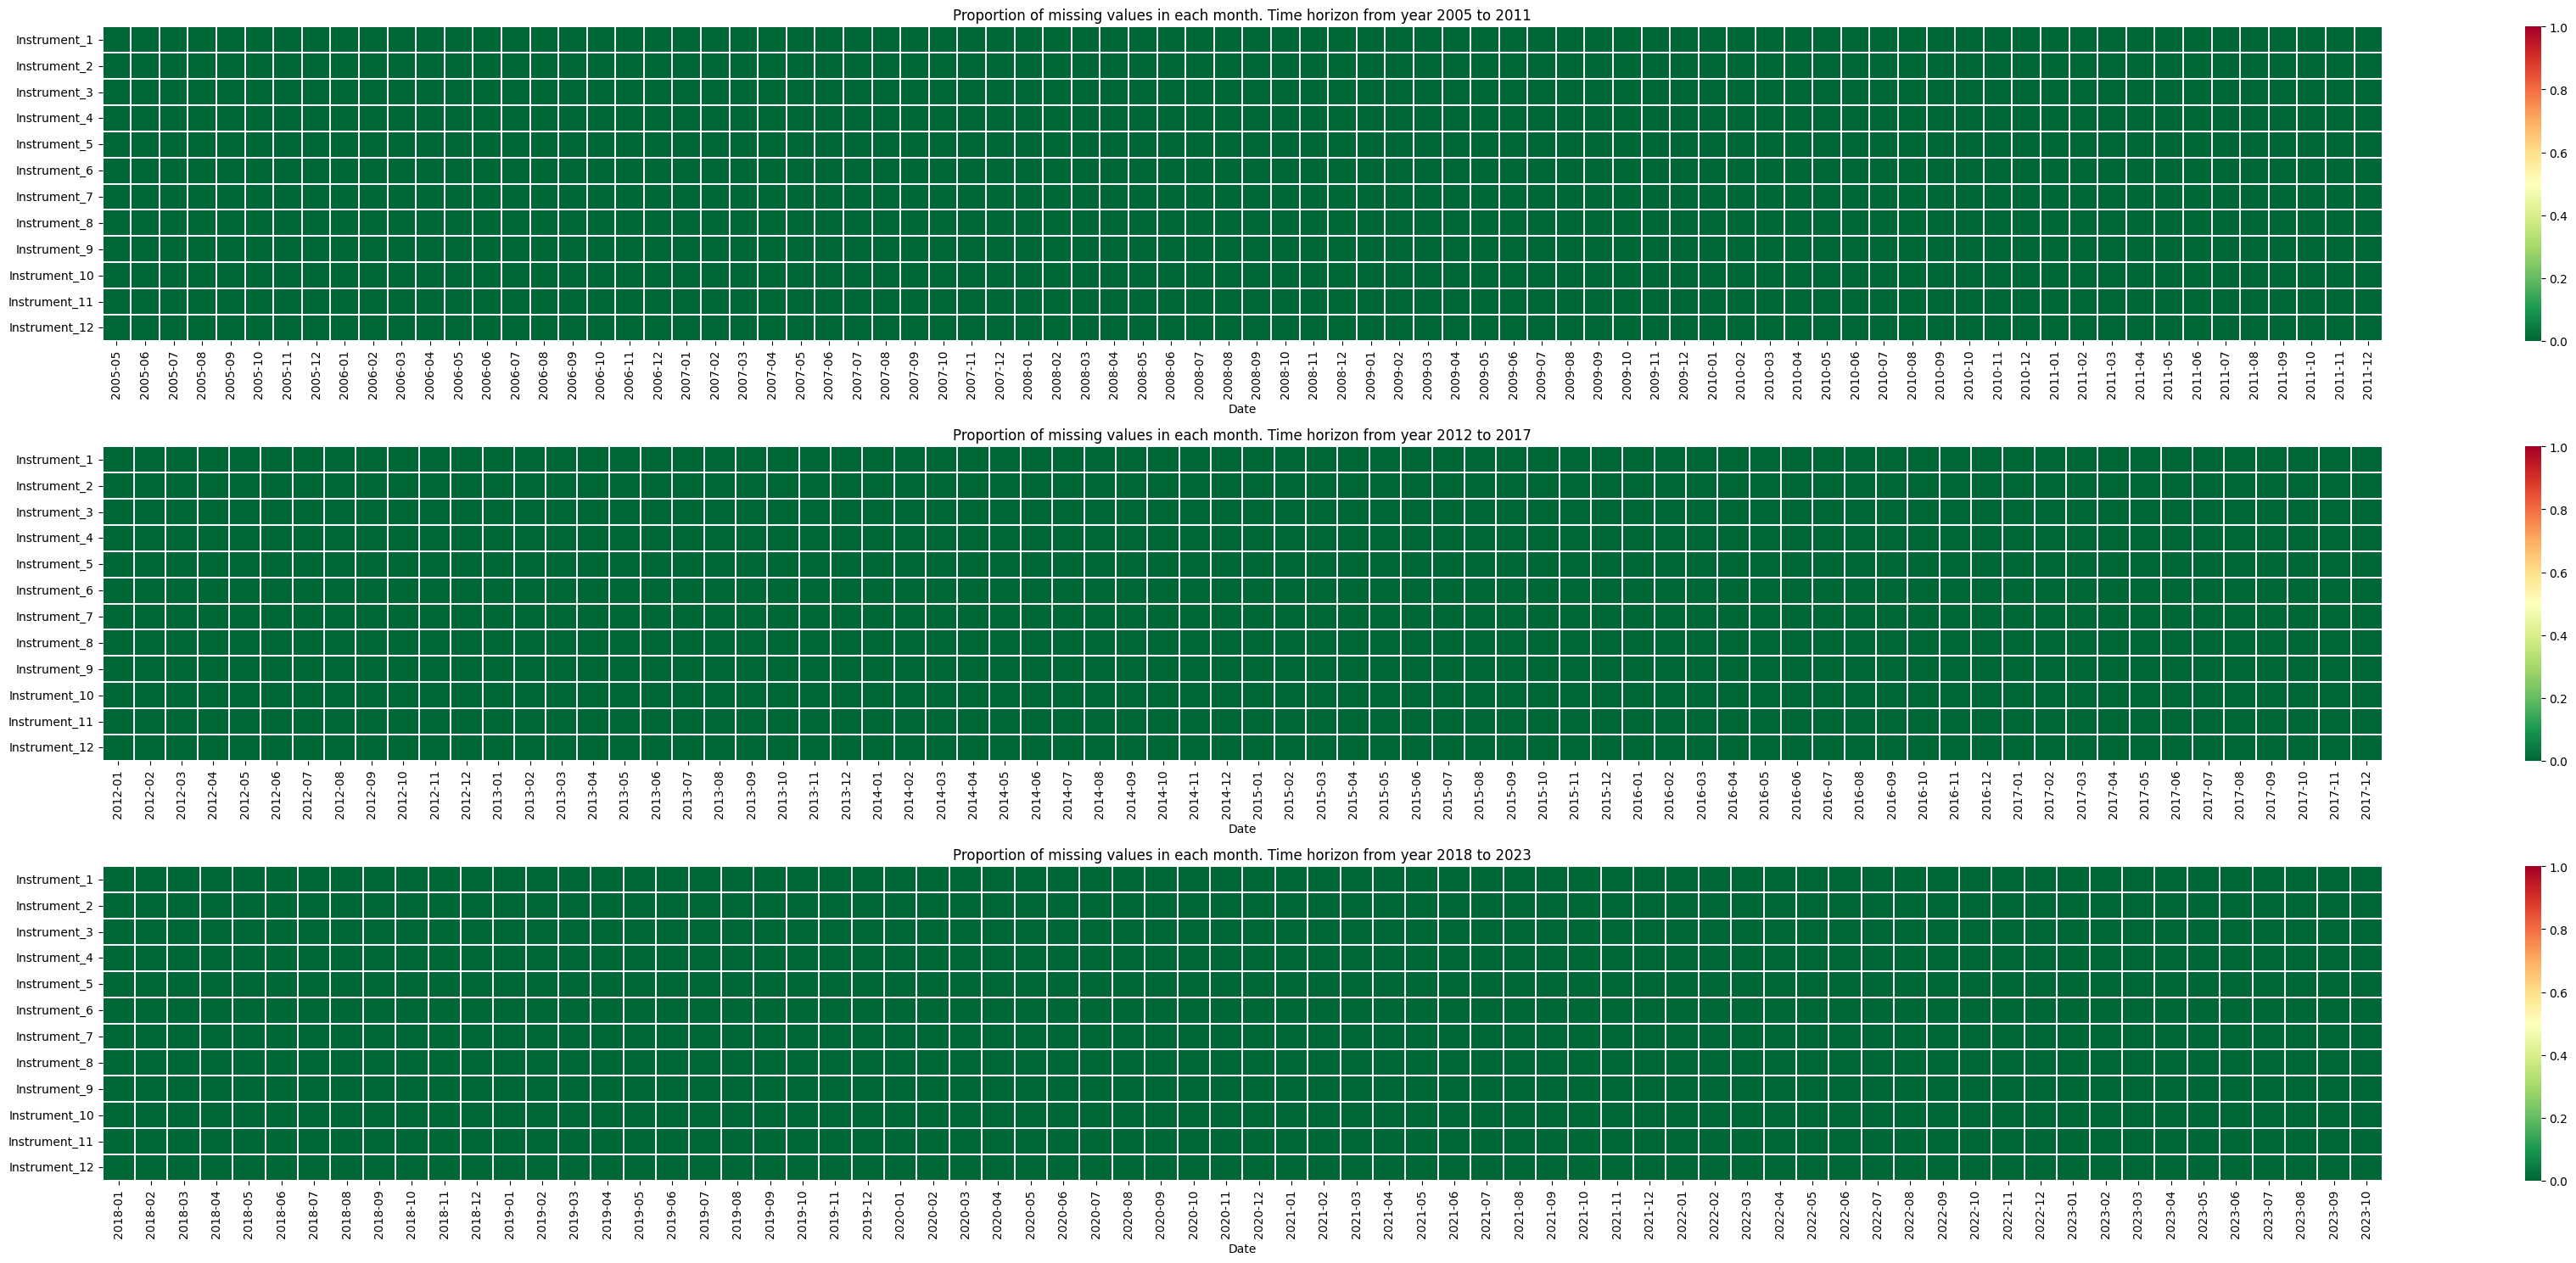

In [63]:
subsplots_dist_na_month(df=df, plot_int=3)

In [64]:
df[df.isna().any(axis=1)]

,Instrument_1,Instrument_2,Instrument_3,Instrument_4,Instrument_5,Instrument_6,Instrument_7,Instrument_8,Instrument_9,Instrument_10,Instrument_11,Instrument_12
Date,,,,,,,,,,,,


#### 3. Data modelling

In [65]:
df.head()

,Instrument_1,Instrument_2,Instrument_3,Instrument_4,Instrument_5,Instrument_6,Instrument_7,Instrument_8,Instrument_9,Instrument_10,Instrument_11,Instrument_12
Date,,,,,,,,,,,,
2023-10-25,3515.34,3928.82,12724.29,3303.06,29017.79,39939.27,3136.11,36.26,1430.00,142.78,135.27,126.61
2023-10-24,3470.98,3869.41,12755.19,3341.87,28949.67,39749.16,3121.05,36.33,1400.83,139.52,132.66,127.65
2023-10-23,3447.22,3833.76,12629.24,3330.78,28796.00,39430.74,3124.98,36.40,1420.24,142.31,135.43,127.53
2023-10-20,3455.93,3862.28,12592.01,3326.03,29447.11,39581.24,3138.37,36.99,1417.46,146.00,140.60,128.97
2023-10-19,3461.48,3825.05,12662.51,3322.86,29339.38,39929.76,3126.74,36.50,1411.01,146.35,141.58,129.52


In [66]:
df.columns

Index(['Instrument_1', 'Instrument_2', 'Instrument_3', 'Instrument_4',
       'Instrument_5', 'Instrument_6', 'Instrument_7', 'Instrument_8',
       'Instrument_9', 'Instrument_10', 'Instrument_11', 'Instrument_12'],
      dtype='object')

In [67]:
# Index values into columns
df = df.reset_index()

In [68]:
# Rename columns
map_tickers = {'Date': 'Trade Date'}
df = df.rename(columns=map_tickers)

In [69]:
# Unpivot columns
df = pd.melt(df, id_vars='Trade Date', var_name='RIC', value_name='Universal Close Price')

In [70]:
# Functions

def dot_separated_date(date):
    """
    Formats a given date object into a dot-separated string.

    Args:
        date (datetime.date): The date to be formatted.

    Returns:
        str: A string representing the date in the format 'dd.mm.yyyy'.
    """
    date_dot_sep = date.strftime('%d.%m.%Y')
    return date_dot_sep

def format_float_to_desired(value):
    """
    Formats a floating-point number as a string with comma and dot swapped.

    Args:
        value (float): The floating-point number to be formatted.

    Returns:
        str: A string representation of the number with ',' and '.' swapped, formatted as 'X,XXX.XX'.
    """
    formatted_value = '{:,.2f}'.format(value).replace(',', 'X').replace('.', ',').replace('X', '.')
    return formatted_value

In [71]:
df['Trade Date'] = df['Trade Date'].apply(dot_separated_date)
df['Universal Close Price'] = df['Universal Close Price'].apply(format_float_to_desired)

In [72]:
df.head()

,Trade Date,RIC,Universal Close Price
0,25.10.2023,Instrument_1,"3.515,34"
1,24.10.2023,Instrument_1,"3.470,98"
2,23.10.2023,Instrument_1,"3.447,22"
3,20.10.2023,Instrument_1,"3.455,93"
4,19.10.2023,Instrument_1,"3.461,48"


#### 4. Create file per date

In [73]:
date_sequence = df['Trade Date'].unique()

In [74]:
date_sequence

array(['25.10.2023', '24.10.2023', '23.10.2023', ..., '04.05.2005',
       '03.05.2005', '02.05.2005'], dtype=object)

In [75]:
def get_filename(date):
    """
    Generates a filename based on a dot-separated date.

    Args:
        date (str): A string representing a date in the format 'dd.mm.yyyy'.

    Returns:
        str: A formatted filename in the format 'yyyymmdd_stock_index'.

    Example:
        If date is '25.10.2023', the function will return '20231025_commodity'.
    """
    date_list = date.split('.')[::-1]
    prefix_date = ''.join(date_list)
    filename = f"{prefix_date}_commodity"
    return filename

In [309]:
# for loop to create a commodity prices file for each date
for date_item in date_sequence:
    # Get date
    df_subset = df[df['Trade Date'] == date_item]
    # Get file name & set path
    file_name = get_filename(date_item)
    file_name_path = f"files_created/{file_name}.csv"
    # Create a file
    df_subset.to_csv(file_name_path, index=None, sep=',')